# Final Model Selected - SVHN Classification Using Convolutional Neural Network on all 73257 training samples

CNN Notebook
Project : Street View House Numbers
By: Peiyao (Celine) Li 

__The model shown in this notebook is the proposed model for this project as it performed the best__

## Preprocessing

The following preprocessing techniques were used: Reshaping the dataset, converting RGB to grayscale, scaling the data, and undersampling the training data to select 2000 data from the whole dataset and have an even distribution among classes


In [4]:
# import all libraries
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import io
from PIL import Image
from sklearn import datasets
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn import preprocessing
import h5py
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [5]:
# path of the dataset from desktop
tr_set = "C:/Users/Celin/Desktop/CelineFirstJupyter/Street_num Final Project/Format 2/train_32x32.mat"
te_set = "C:/Users/Celin/Desktop/CelineFirstJupyter/Street_num Final Project/Format 2/test_32x32.mat"

In [6]:
#dataset load-in
data = loadmat(tr_set)
te_data = loadmat(te_set)

X_tr, y_tr = data['X'], data['y']
X_te, y_te = te_data['X'], te_data['y']

In [7]:
# explore training data details
print ("Training Set Shape Params: <width, height, channels [rgb], # of images>")
print("X Shape: ", X_tr.shape, " y Shape: ", y_tr.shape)

Training Set Shape Params: <width, height, channels [rgb], # of images>
X Shape:  (32, 32, 3, 73257)  y Shape:  (73257, 1)


In [8]:
#explore numbers of pixels in total in each set
X_tr.size, X_te.size

(225045504, 79970304)

In [9]:
# transpose data to (# of images, width, height, rgb)
X_tr, y_tr = X_tr.transpose((3,0,1,2)), y_tr[:,0]
X_te, y_te = X_te.transpose((3,0,1,2)), y_te[:,0]
print("X Shape: ", X_tr.shape, " y Shape: ", y_tr.shape)

X Shape:  (73257, 32, 32, 3)  y Shape:  (73257,)


In [10]:
# explore all the labels , note that 0 was originally labled as 10
np.set_printoptions(threshold=np.inf)
# print(y_tr)

In [11]:
# change all label "10" to 0 as shown in images
for i in range(len(y_tr)):
    if (y_tr[i]==10):
        y_tr[i]=0
for i in range(len(y_te)):
    if (y_te[i]==10):
        y_te[i]=0  
# print(y_tr)#check to see the new labels

In [12]:
# convert RGB to grayscale for feature engineering
def rgb2gray(img_data):
    return np.expand_dims(np.dot(img_data, [0.3, 0.6, 0.1]), axis=3)

X_tr_gr = rgb2gray(X_tr).astype(np.float32) # converts gray training set to float values
print("Training Set", X_tr_gr.shape)
X_tr = X_tr_gr # replace original training set

X_te_gr = rgb2gray(X_te).astype(np.float32) # converts gray testing set to float values
print("Testing Set", X_te_gr.shape)
X_te = X_te_gr # replace original testing set

Training Set (73257, 32, 32, 1)
Testing Set (26032, 32, 32, 1)


In [13]:
#see can example greyscale image, clarity is still pretty good
digit_img = X_tr[0].reshape((32,32))
# plt.imshow(digit_img, cmap='gray')
# plt.show()

In [14]:
# create train and test set
train_images = X_tr
test_images = X_te
train_labels = y_tr
test_labels = y_te

In [15]:
# print max values to scale the values 
print(np.max(train_images))
print(np.max(test_images))

255.0
255.0


In [16]:
#scale our data (normalization)to be between 0 and 1 - feature engineering
train_images, test_images = train_images / 255.0, test_images / 255.0

# Implement Convolutional Neural Network Model

Note that lots of trials of model architecture and hyperparamater searching was done to arrive at the final proposed model below. For the cleanliness of the notebook, only the final proposed model is included in this submission notebook, and the rest of the trials of various architectures and hyperparamaters's results are summerized in the two tables below.

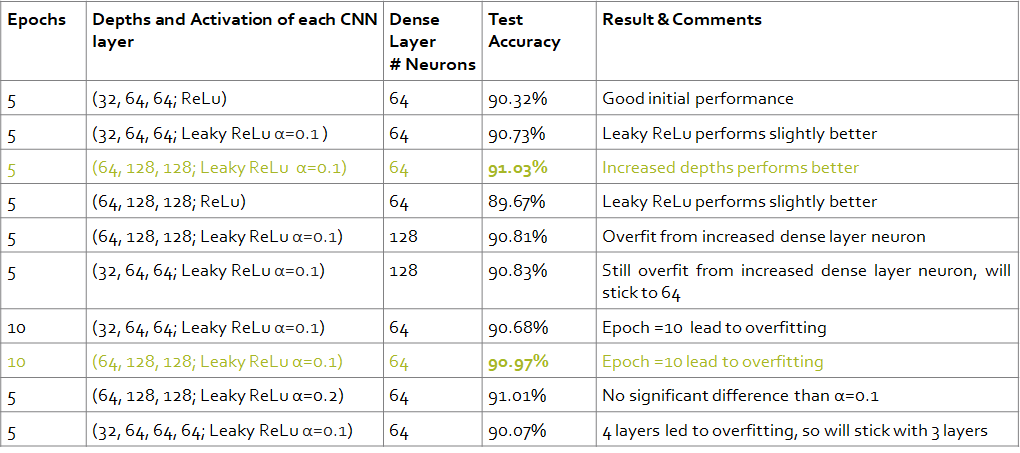

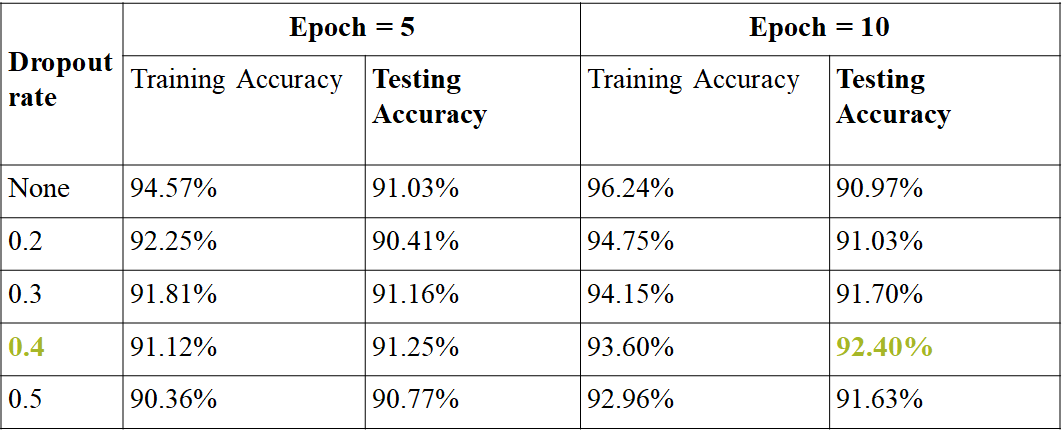

The final model architecture is shown below, it achieved the test accuracy of 92.4% as highlighted above.

In [17]:
#Through trial it is found 3 CNN layers with depths 64,128 and 128 performed the best
# the first two convolutional layers are followed by a MaxPooling where the size of the output is reduced
# 3 by 3 is standard filter size in CNN, and 32/64/128 are the standard output channel depths, by convention the latter layers have more depth
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=(32, 32, 1)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 13, 13, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv

In [18]:
# define dense layer array
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#through trials it is found that relu activiation peforms best
model.add(layers.Dropout(0.4))#through trial it is found that dropout=0.4 peforms best
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 13, 13, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
___________________________

In [19]:
# compile model and train the dataset
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)#though trail it is found epoch of 10 performed best


Epoch 1/10
73257/73257 [==============================] - 188s 3ms/sample - loss: 0.8303 - acc: 0.7381
Epoch 2/10
73257/73257 [==============================] - 188s 3ms/sample - loss: 0.4435 - acc: 0.8702
Epoch 3/10
73257/73257 [==============================] - 189s 3ms/sample - loss: 0.3734 - acc: 0.8912
Epoch 4/10
73257/73257 [==============================] - 187s 3ms/sample - loss: 0.3327 - acc: 0.9039s - 
Epoch 5/10
73257/73257 [==============================] - 185s 3ms/sample - loss: 0.3020 - acc: 0.9126
Epoch 6/10
73257/73257 [==============================] - 189s 3ms/sample - loss: 0.2786 - acc: 0.9186
Epoch 7/10
73257/73257 [==============================] - 189s 3ms/sample - loss: 0.2597 - acc: 0.9250
Epoch 8/10
73257/73257 [==============================] - 190s 3ms/sample - loss: 0.2454 - acc: 0.9287
Epoch 9/10
73257/73257 [==============================] - 191s 3ms/sample - loss: 0.2330 - acc: 0.9322
Epoch 10/10
73257/73257 [==============================] - 190s 3ms/s

# Model Evaluation

Testing accuracy and confusion matrix were utilized to evaluate model performance

In [20]:
# testing
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_pred=model.predict(test_images)

26032/26032 [==============================] - 28s 1ms/sample - loss: 0.3040 - acc: 0.9240


In [21]:
# testing accuracy output
print(test_acc)

0.9240166


A 92.4% test accuracy is very good! Thus, this is the final proposed model for this project.

In [22]:
#double check to confirm the model is performing correctly
#Check the softmax distribution for each category for the first 10 images and print their labels
output = model.predict(test_images[:10])
print(output)
print(np.argmax(output, axis=1))

[[6.78110856e-09 6.86263957e-05 1.35976890e-07 3.96785559e-04
  3.62070494e-07 9.99081731e-01 4.43551427e-04 7.55004476e-06
  5.90016612e-07 6.97433393e-07]
 [7.41329220e-12 4.79231488e-10 9.99996305e-01 3.49751667e-06
  2.12576866e-11 2.70547929e-12 3.45910835e-11 1.99402351e-07
  1.22406436e-12 1.13044600e-11]
 [2.89836839e-12 9.99033809e-01 7.13242443e-08 6.01561301e-10
  9.66090767e-04 1.45769974e-12 5.45611924e-11 2.95543381e-11
  4.52019000e-09 2.11244321e-11]
 [9.82077777e-01 3.03457739e-07 3.03885918e-06 1.49271800e-05
  4.16507717e-09 1.66608743e-07 9.90517717e-03 1.28298314e-08
  7.59228179e-03 4.06245847e-04]
 [3.82748432e-04 1.06266397e-03 4.04396314e-06 2.10711602e-04
  2.94910642e-05 7.10712699e-03 9.89488900e-01 9.93391313e-06
  1.70083076e-03 3.51254812e-06]
 [6.18238846e-06 9.99705374e-01 2.87559469e-05 1.98739099e-06
  2.43712129e-04 1.10942784e-08 7.29209546e-07 3.02071157e-06
  7.62920899e-06 2.56593648e-06]
 [4.24206547e-07 2.73141154e-08 1.22333961e-06 5.65950613e

(32, 32) 5


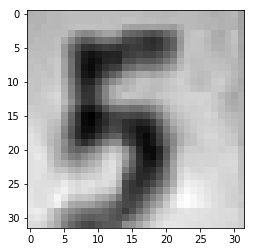

(32, 32) 2


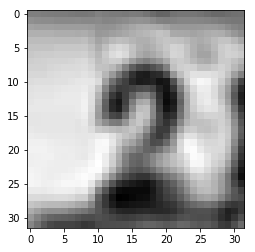

(32, 32) 1


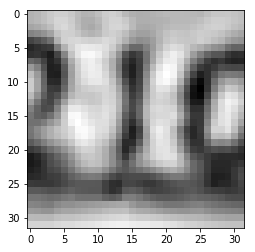

(32, 32) 0


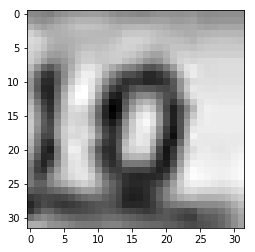

(32, 32) 6


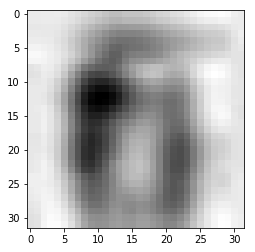

(32, 32) 1


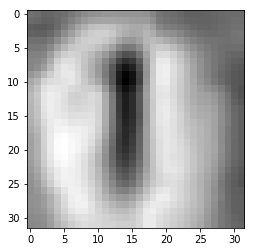

(32, 32) 9


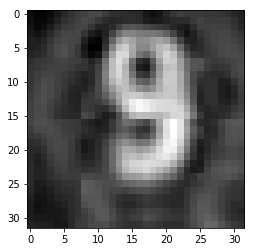

(32, 32) 1


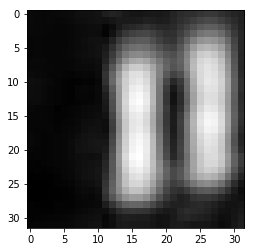

(32, 32) 1


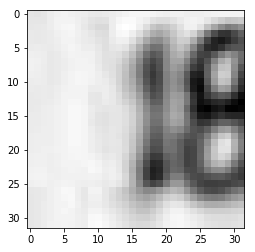

(32, 32) 8


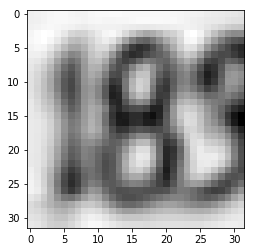

In [23]:
# view 10 test images to make sure they actually match their labels printed above, and they do! yay!
X_orig_tr = data['X']
X_orig_te = te_data['X']

for i in range(0,10):
    show_img = X_te[i].reshape((32,32))
    print(show_img.shape,y_te[i])
    plt.imshow(show_img,cmap='gray')
    plt.show()


In [24]:
#confusion matrix to see what the frequent mistakes are
test_pred = np.argmax(test_pred, axis=1)
confusion_matrix(test_labels,test_pred)

array([[1606,   28,   12,    7,    3,    5,   40,    5,   10,   28],
       [  16, 4904,   26,   29,   57,   10,    8,   39,    5,    5],
       [   5,   40, 3921,   74,   39,   12,    7,   31,   10,   10],
       [   9,   72,   28, 2620,   15,   45,   15,    8,   26,   44],
       [   9,  111,   18,   13, 2336,    4,   10,    7,    6,    9],
       [   4,   17,    9,   67,    5, 2221,   40,    4,    3,   14],
       [  32,   21,    9,   13,   18,   59, 1796,    4,   16,    9],
       [   2,  125,   27,   15,    4,    4,    2, 1836,    0,    4],
       [  19,   21,   11,   43,    9,   22,   94,    1, 1402,   38],
       [  37,   18,   63,   24,    8,    9,   13,    3,    8, 1412]],
      dtype=int64)

Total of over 26,000 test samples used:
The model performed very well with very few misclassification considering the very large testing dataset: 
Some 1 misclassified as 4 and 7
Some 3 misclassed as 2 and 5
Some 6 misclassed as 8 

This makes sense from a pattern recognition perspective as 1,4 ,7 all have a vertical line. 3,2,5 all have a half cricle with a horizontal line. 6 and 8 all have circles. Thus, CNN is making prediction based on these patterns instead of doing something weird. This fruther confirms the model's prediction makes sense and is useful.

Thus, this is the final proposed model which can effectively classify 92% of the street view housing number images correctly!

Some suggestions below that might be able to futher increase the model's performance.But I did not try so due to limited computation power.
1) Add more training samples of the ones that will likely be to misclassified and boost weak classifiers!
2) Perform more grid search
3) Use larger training set
4) Look for source images with higher resolution (e.g. 64x64 instead of 32x32 from this source dataset).

# CNN Model Visualization 

Although it is not in the scope of the project,I added visualization of CNN filters and filtered images of two test images in case you are curious what the CNN model is doing.Note that the visualization code below are not all produced by myself, I refered to these sources: https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0; https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/; https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-visualizing-convolutional-neural-networks/

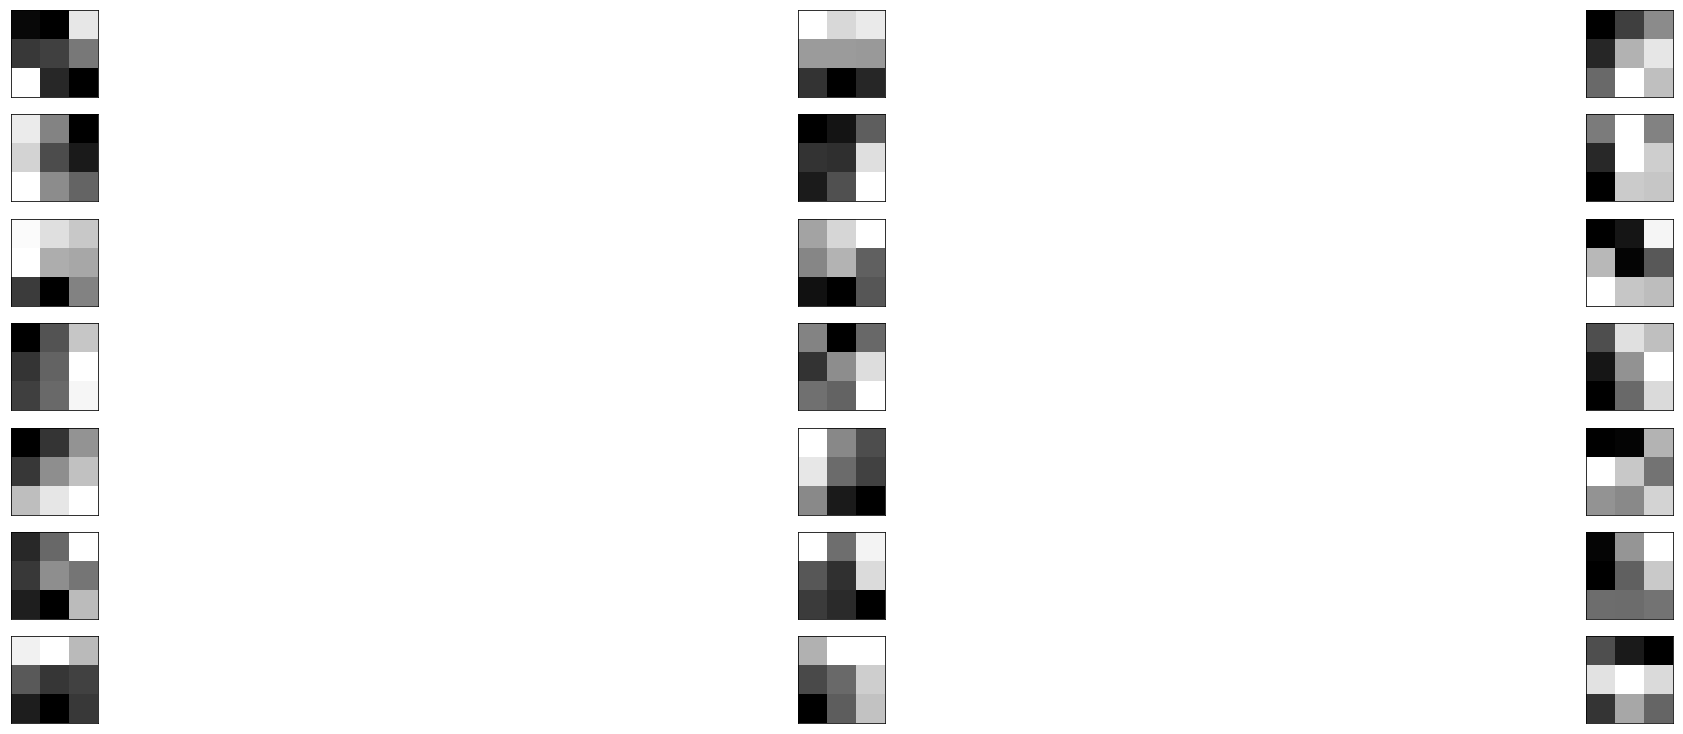

In [25]:
filters, biases = model.layers[0].get_weights()
n_filters, ix = 21, 1
plt.figure(figsize=(40,40))
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

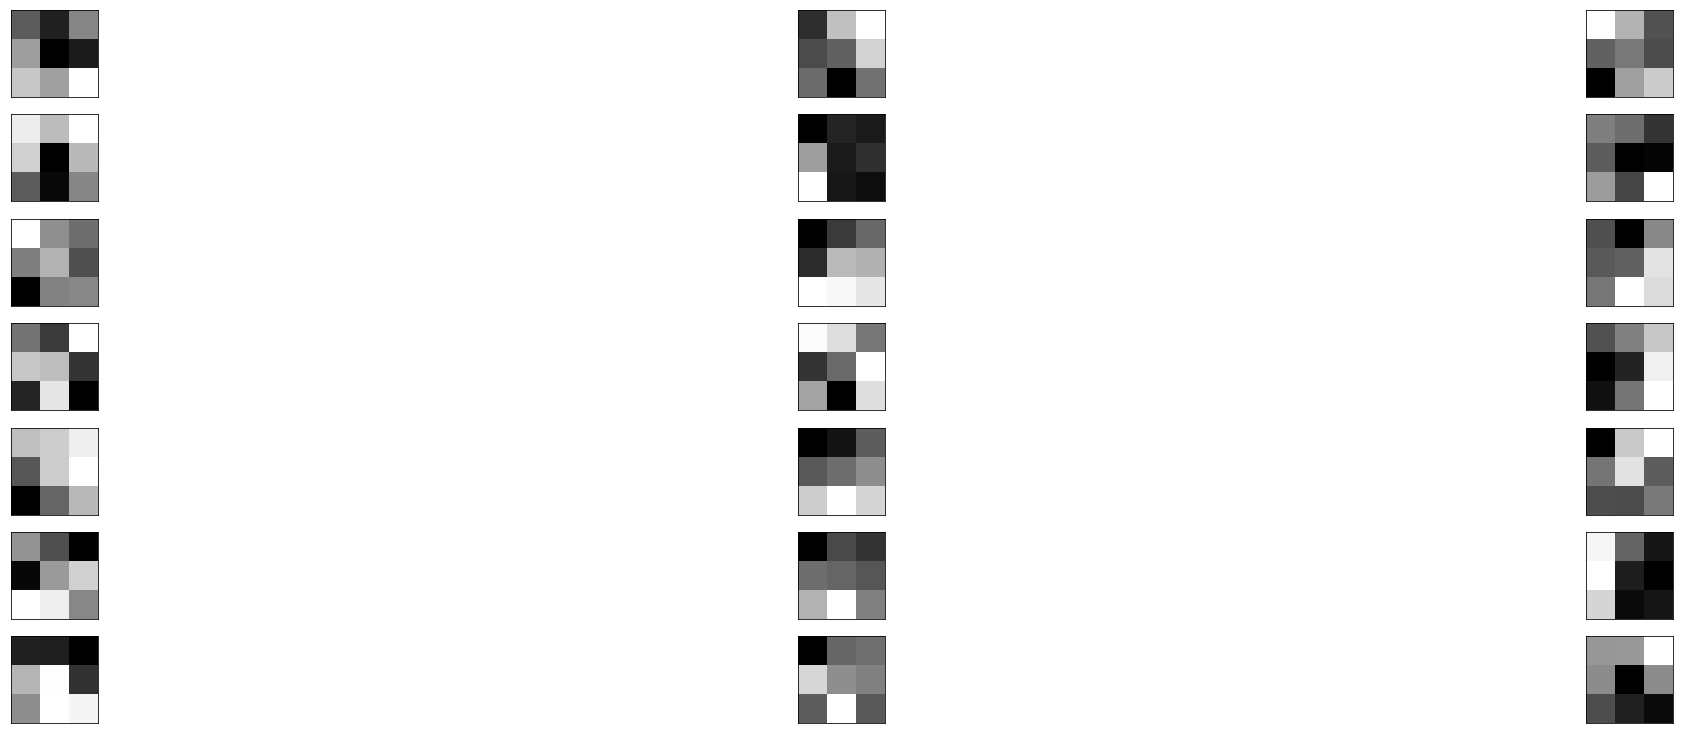

In [26]:
filters, biases = model.layers[3].get_weights()
plt.figure(figsize=(40,40))
n_filters, ix = 21, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

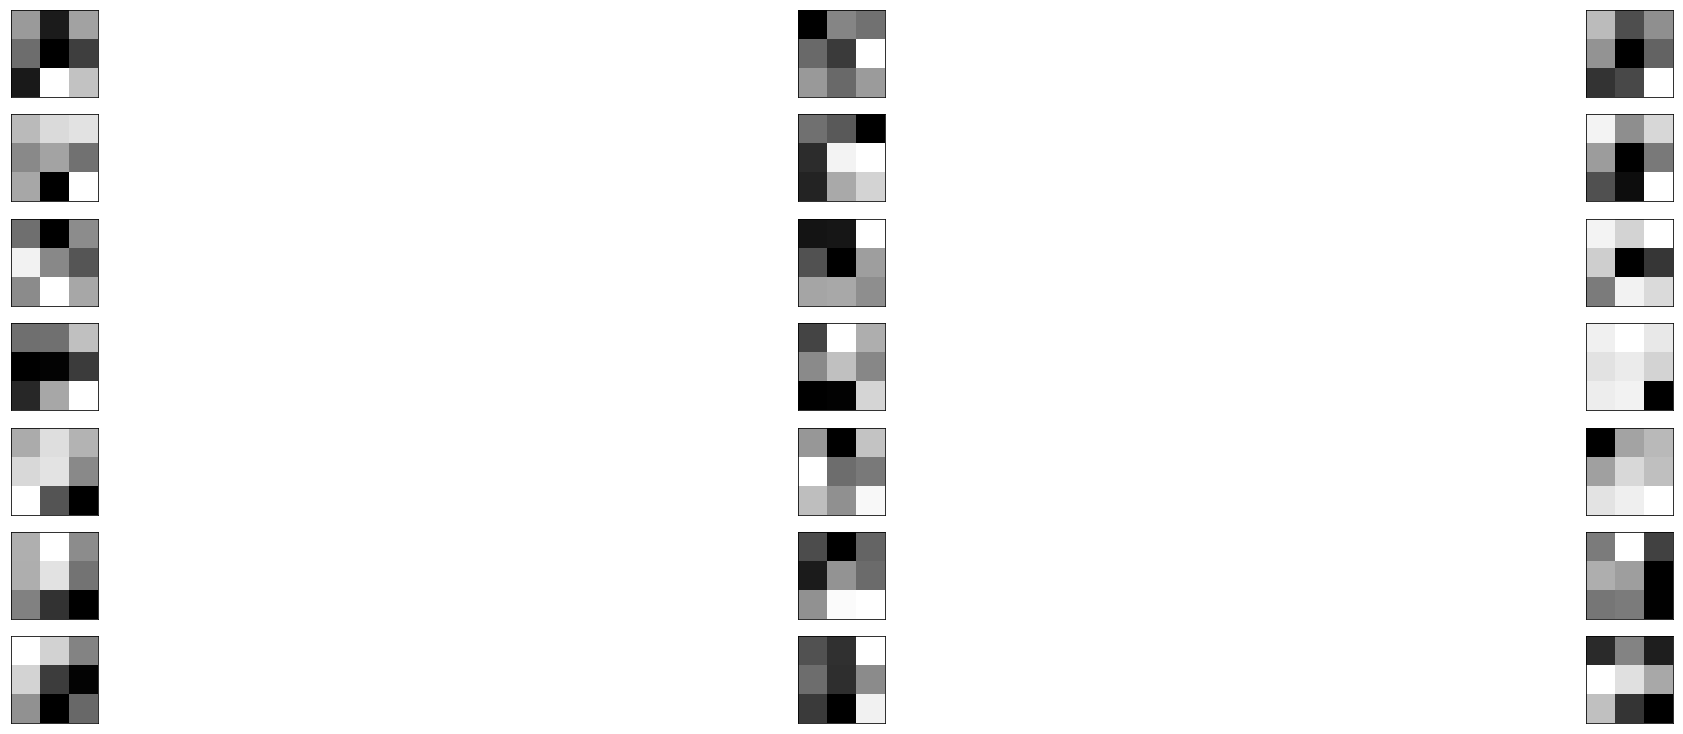

In [27]:
filters, biases = model.layers[6].get_weights()
plt.figure(figsize=(40,40))
n_filters, ix = 21, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [28]:
layer_outputs = [layer.output for layer in model.layers[:9]] # Extracts the outputs of the top 9 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [29]:
activations = activation_model.predict(test_images[5].reshape((1,32,32,1))) 
# Returns a list of Numpy arrays: one array per layer activation
first_CNNlayer_activation = activations[0]
second_CNNlayer_activation = activations[3]
last_CNNlayer_activation = activations[6]

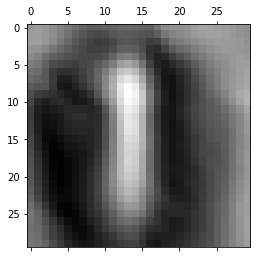

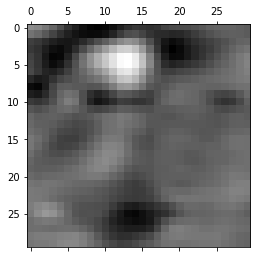

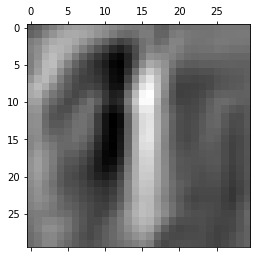

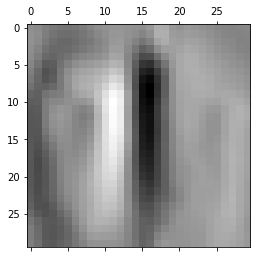

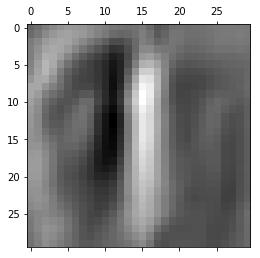

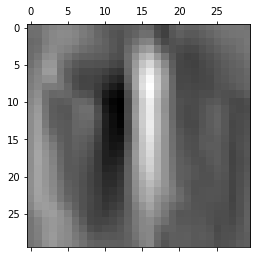

In [30]:
for i in range (6):
    plt.matshow(first_CNNlayer_activation[0, :, :, i], cmap='gray')

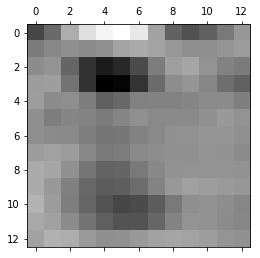

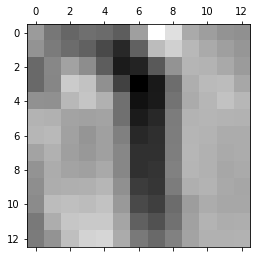

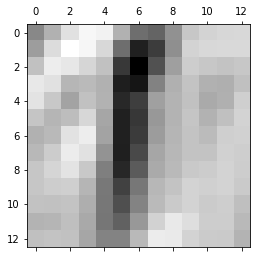

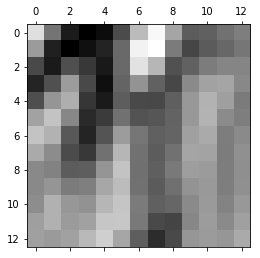

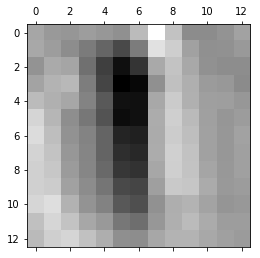

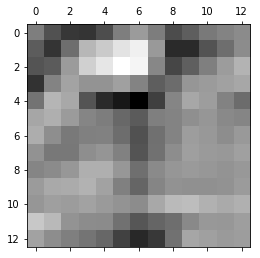

In [31]:
for i in range (6):
    plt.matshow(second_CNNlayer_activation[0, :, :, i], cmap='gray')

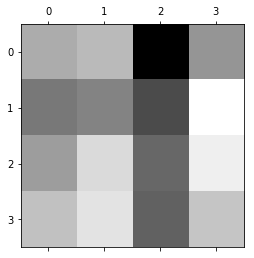

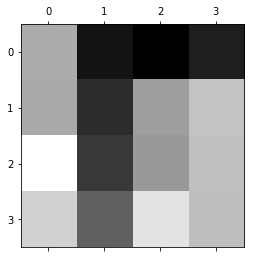

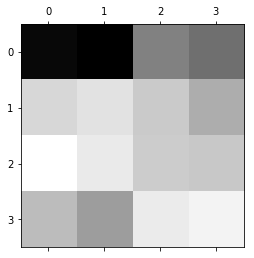

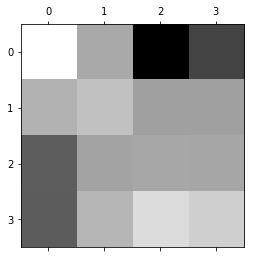

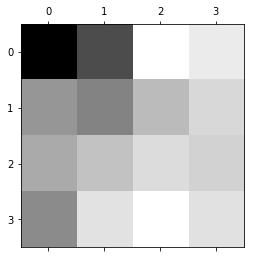

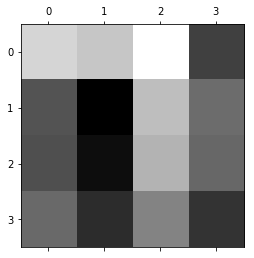

In [32]:
for i in range (6):
    plt.matshow(last_CNNlayer_activation[0, :, :, i], cmap='gray')

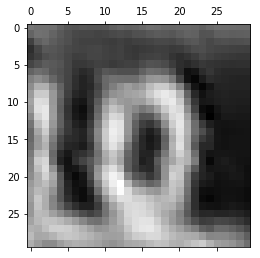

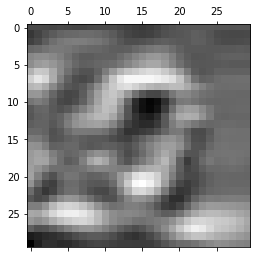

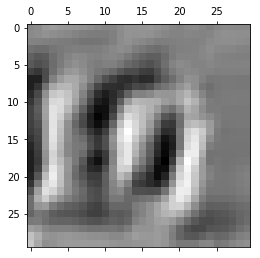

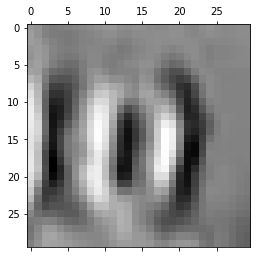

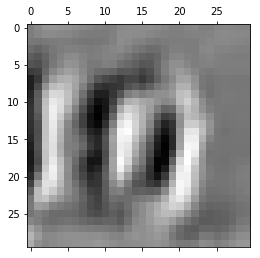

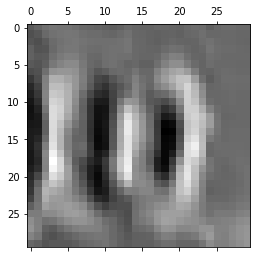

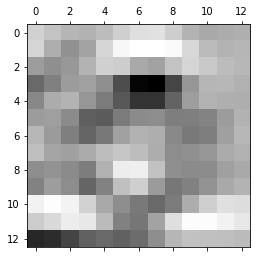

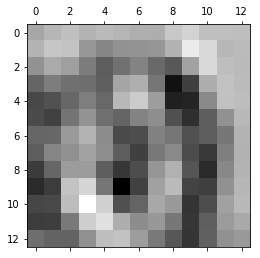

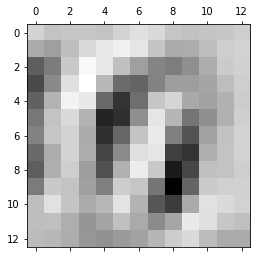

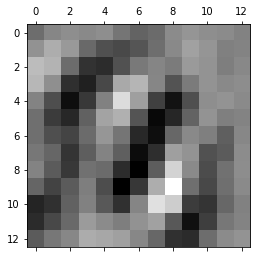

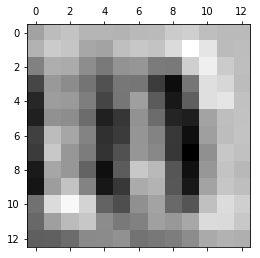

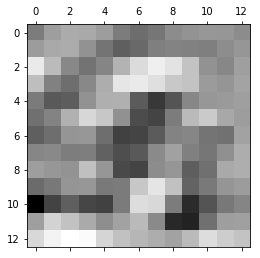

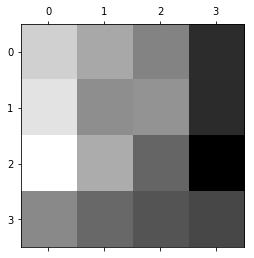

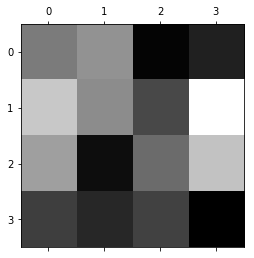

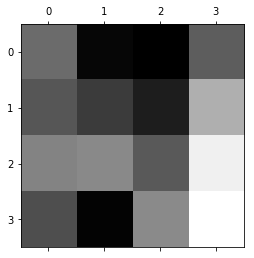

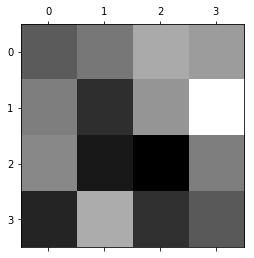

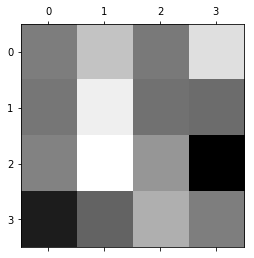

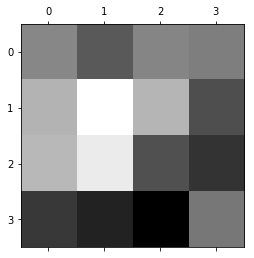

In [33]:
activations = activation_model.predict(test_images[3].reshape((1,32,32,1))) 
# Returns a list of Numpy arrays: one array per layer activation
first_CNNlayer_activation = activations[0]
second_CNNlayer_activation = activations[3]
last_CNNlayer_activation = activations[6]
for i in range (6):
    plt.matshow(first_CNNlayer_activation[0, :, :, i], cmap='gray')
for i in range (6):
    plt.matshow(second_CNNlayer_activation[0, :, :, i], cmap='gray')
for i in range (6):
    plt.matshow(last_CNNlayer_activation[0, :, :, i], cmap='gray')

# End of the project codes, thank you for your time in advance.